In [85]:
import numpy as np
from matplotlib import pyplot as plt
import lqfn.numerical.pimc.metropolis as metropolis

Calculation of the correlation function 
$$
    G(t) = \frac{1}{N} \sum_j \langle x(t_j+t)x(t_j) \rangle
$$
for a one dimensional harmonic oscillator

In [86]:
N=20
a=0.5
eps=1.4
N_cor=20
N_cf=1000
E_0 = 0.5
E_1 = 1.5
N_copies =10

In [87]:
t = np.arange(N-1) * a
E_exact = np.ones(N-1) * (a*(E_1-E_0)) #expected energy

In [88]:
def S(j,x): # harm. osc. S
    jp = (j+1)%N # next site
    jm = (j-1)%N # previous site
    return a*x[j]**2/2 + x[j]*(x[j]-x[jp]-x[jm])/a

In [89]:
def compute_G(x,n):
    g = 0
    for j in range(0,N):        
        g = g + x[j]*x[(j+n)%N]
    return g/N

In [90]:
avg_25, std_25 = metropolis.compute_path_integral_average(compute_G, S, N, 25, N_cor, eps)
avg_100, std_100 = metropolis.compute_path_integral_average(compute_G, S, N, 100, N_cor, eps)
avg_1000, std_1000 = metropolis.compute_path_integral_average(compute_G, S, N, 1000, N_cor, eps)
avg_10000, std_10000 = metropolis.compute_path_integral_average(compute_G, S, N, 10000, N_cor, eps)

Calculation of the excitation energy
$$ 
    \Delta E_n = log \left(\frac{G_n}{G_{n+1}} \right)
$$
The error associated to the excitation energy has been computed using the standard formula for the error propagation 
$$
    \delta \Delta E_n = \sqrt { \left | \left({\frac{\partial \Delta E_n}{\partial G_n}} \right)^2 \right | \delta G_{n}^2 + \left | \left({\frac{\partial \Delta E_n}{\partial G_{n+1}}} \right)^2 \right | \delta G_{n+1}^2 } = \sqrt{ \left( \frac{\delta G_n}{G_n} \right)^2 + \left(\frac{\delta G_{n+1}}{G_{n+1}} \right)^2 } 
$$

In [91]:
def delta_E(avg):
    delta_E = np.zeros(N-1)
    for n in range (0,N-1):
        delta_E[n] = np.log(np.abs(avg[n]/avg[n+1]))
    return delta_E

def error_delta_E(avg, std):
    error_delta_E = np.zeros(N-1)
    for n in range (0,N-1):
        error_delta_E[n] = np.sqrt(((std[n] / avg[n])**2 + 
                                   (std[n+1] / avg[n+1])**2)) #propagation of error
    return error_delta_E

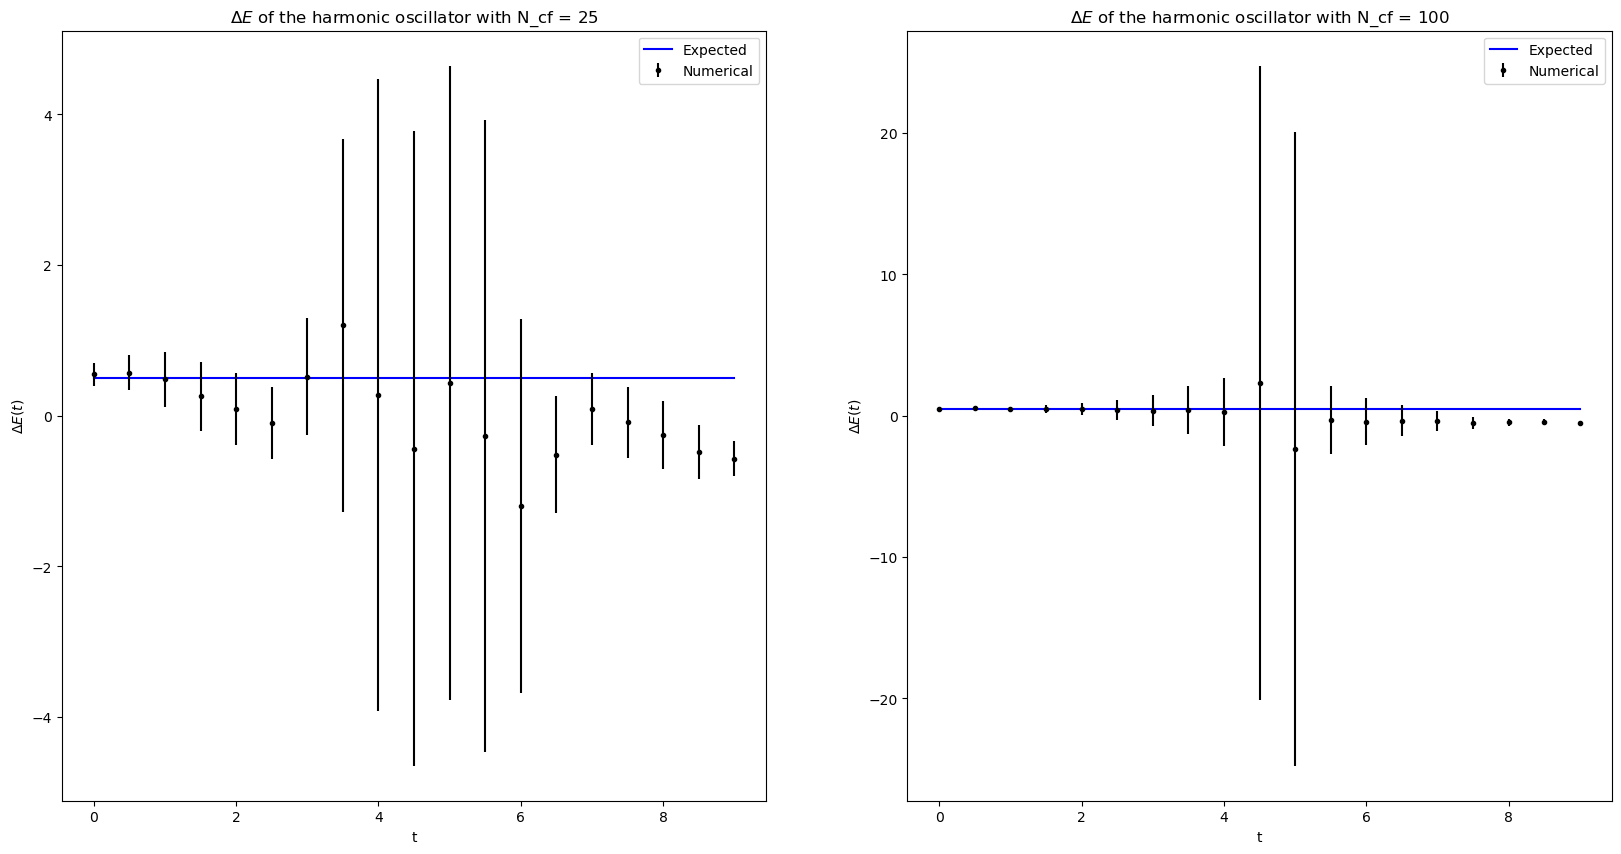

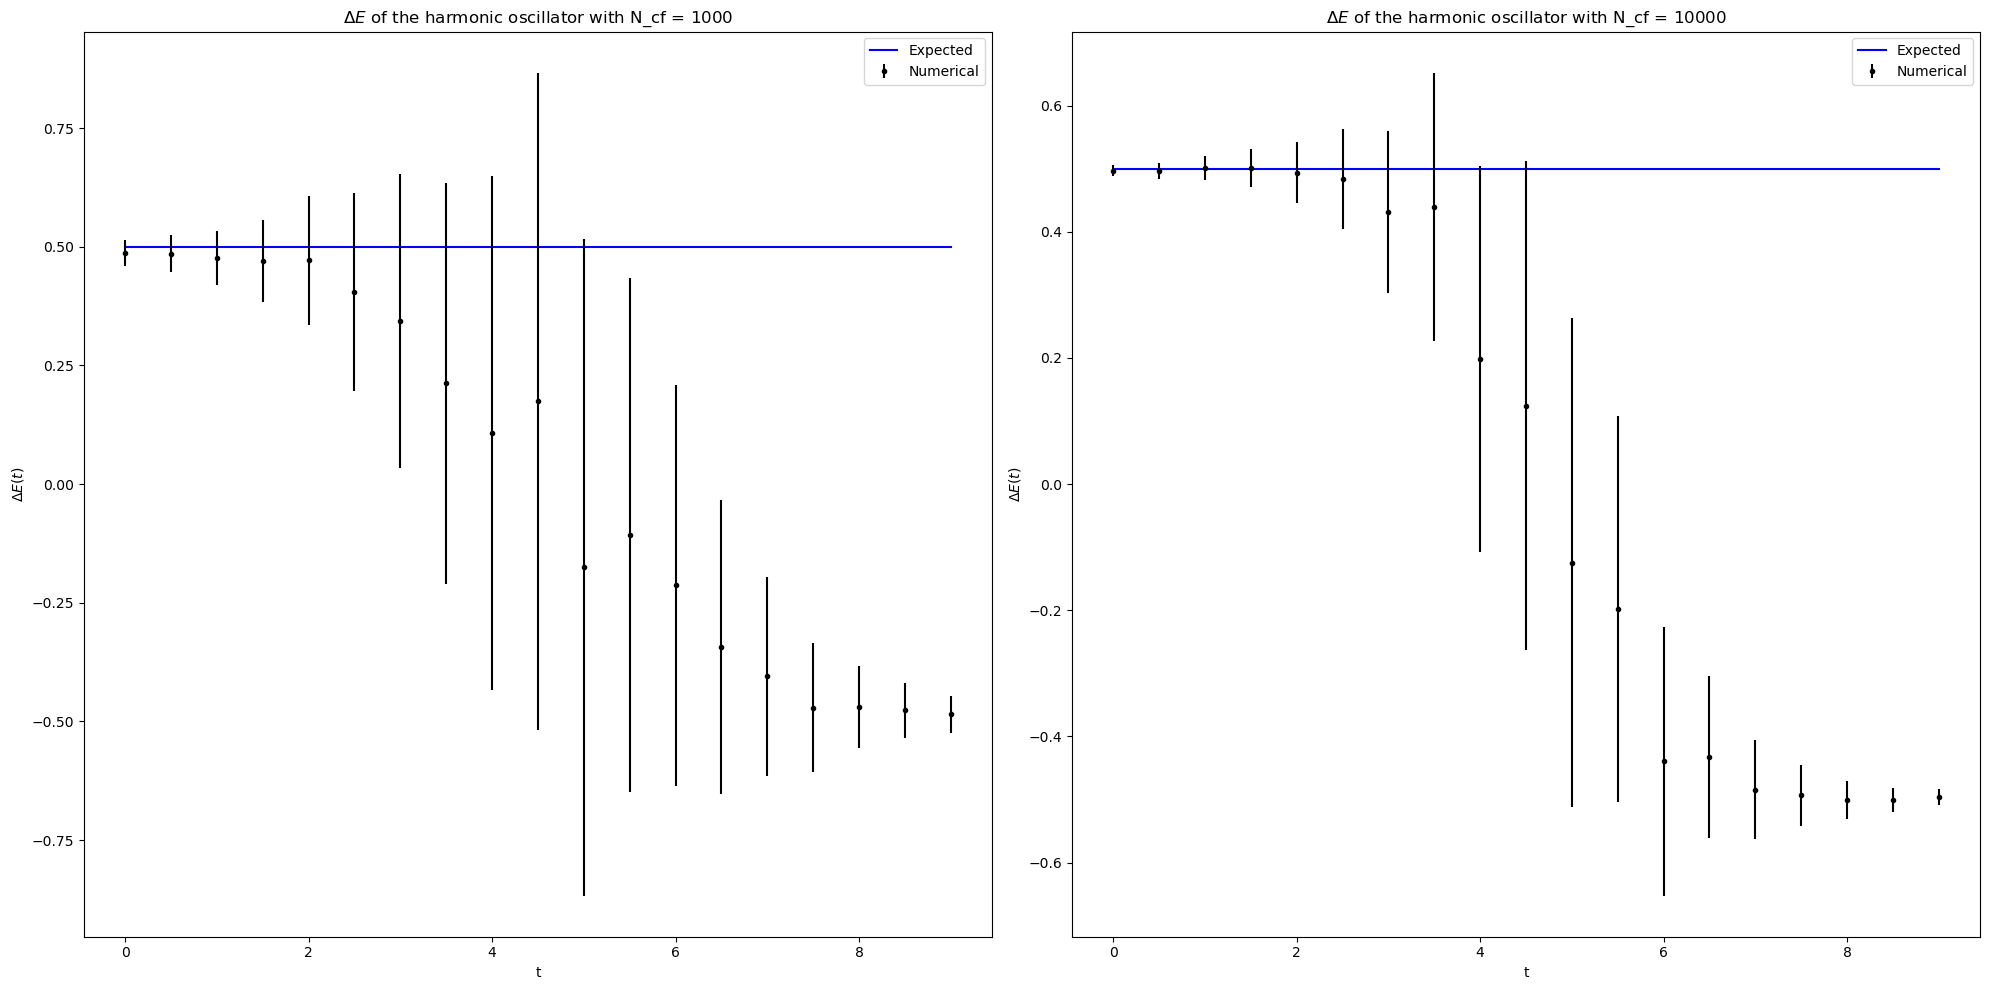

In [92]:
fig_1, axes = plt.subplots(1, 2, figsize=(20, 10))

# Primo grafico (Grafico corrente)
axes[0].plot(t, E_exact ,'b', label='Expected')
axes[0].errorbar(t, delta_E(avg_25), yerr=error_delta_E(avg_25, std_25), fmt='.', color='black', label='Numerical')
axes[0].legend(loc='upper right')
axes[0].set_title(r'$\Delta E$ of the harmonic oscillator with N_cf = 25')
axes[0].set_xlabel('t')
axes[0].set_ylabel(r'$\Delta E(t)$')

axes[1].plot(t, E_exact ,'b', label='Expected')
axes[1].errorbar(t, delta_E(avg_100), yerr=error_delta_E(avg_100, std_100), fmt='.', color='black', label='Numerical')
axes[1].legend(loc='upper right')
axes[1].set_title(r'$\Delta E$ of the harmonic oscillator with N_cf = 100')
axes[1].set_xlabel('t')
axes[1].set_ylabel(r'$\Delta E(t)$')

fig_2, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].plot(t, E_exact ,'b', label='Expected')
axes[0].errorbar(t, delta_E(avg_1000), yerr=error_delta_E(avg_1000, std_1000), fmt='.', color='black', label='Numerical')
axes[0].legend(loc='upper right')
axes[0].set_title(r'$\Delta E$ of the harmonic oscillator with N_cf = 1000')
axes[0].set_xlabel('t')
axes[0].set_ylabel(r'$\Delta E(t)$')

axes[1].plot(t, E_exact ,'b', label='Expected')
axes[1].errorbar(t, delta_E(avg_10000), yerr=error_delta_E(avg_10000, std_10000), fmt='.', color='black', label='Numerical')
axes[1].legend(loc='upper right')
axes[1].set_title(r'$\Delta E$ of the harmonic oscillator with N_cf = 10000')
axes[1].set_xlabel('t')
axes[1].set_ylabel(r'$\Delta E(t)$')


# Aggiusta automaticamente gli spazi tra i grafici
plt.tight_layout()

# Mostra i grafici
plt.show()

Calculation of the correlation function 
$$
    G_{cube}(t) = \frac{1}{N} \sum_j \langle x^3(t_j+t)x^3(t_j) \rangle
$$
for a one dimensional harmonic oscillator

In [93]:
def compute_G_cube(x,n):
    g = 0
    for j in range(0,N):        
        g = g + (x[j]*x[(j+n)%N])**3
    return g/N

In [94]:
avg_cube, std_cube = metropolis.compute_path_integral_average(compute_G_cube, S, N, N_cf, N_cor, eps)

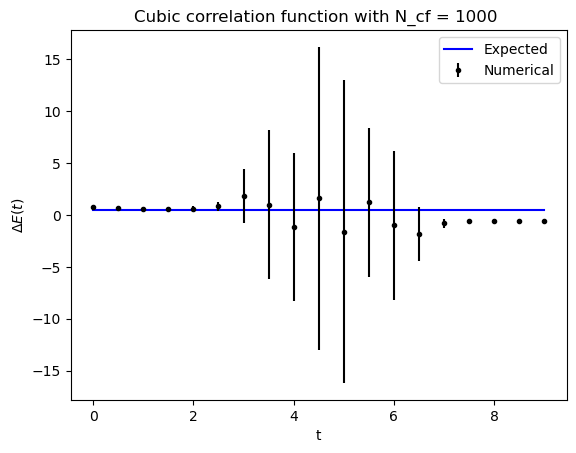

In [95]:
plt.plot(t, E_exact ,'b',label='Expected')
plt.errorbar(t, delta_E(avg_cube), yerr=error_delta_E(avg_cube,std_cube),color='black' ,label='Numerical',fmt='.')
plt.legend(loc='upper right')
plt.title('Cubic correlation function with N_cf = 1000 ')
plt.xlabel('t')
plt.ylabel(r'$\Delta E(t)$')
plt.show()

Calculation of the correlation function 
$$
    G(t) = \frac{1}{N} \sum_j \langle x(t_j+t)x(t_j) \rangle
$$
for a one dimensional harmonic oscillator using bootstrap procedure

In [96]:
avg_bootstrap = np.zeros((N_copies,N))
for i in range (N_copies):
    avg_bootstrap[i] = metropolis.compute_path_integral_average_bootstrap(compute_G, S, N, N_cf, N_cor, eps)[0]

In [97]:
def compute_delta_E_bootstrap(avg_bootstrap):
    delta_E_bootstrap = np.zeros((N_copies,N-1))
    for i in range (N_copies):
        delta_E_bootstrap[i] = delta_E(avg_bootstrap[i])
    avg = delta_E_bootstrap.mean(axis=0)
    std = delta_E_bootstrap.std(axis=0) 
    return avg, std

In [98]:
average_delta_E_with_bootstrap, std_delta_E_with_boostrap = compute_delta_E_bootstrap(avg_bootstrap)

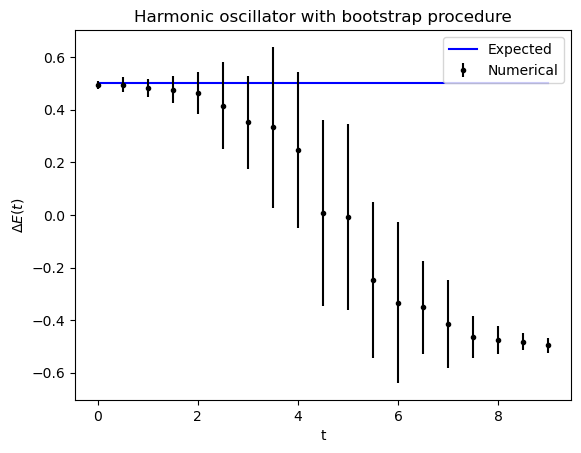

In [99]:
plt.plot(t, E_exact ,'b',label='Expected')
plt.errorbar(t, average_delta_E_with_bootstrap, yerr=std_delta_E_with_boostrap,color='black' ,label='Numerical',fmt='.')
plt.legend(loc='upper right')
plt.title('Harmonic oscillator with bootstrap procedure')
plt.xlabel('t')
plt.ylabel(r'$\Delta E(t)$')
plt.show()